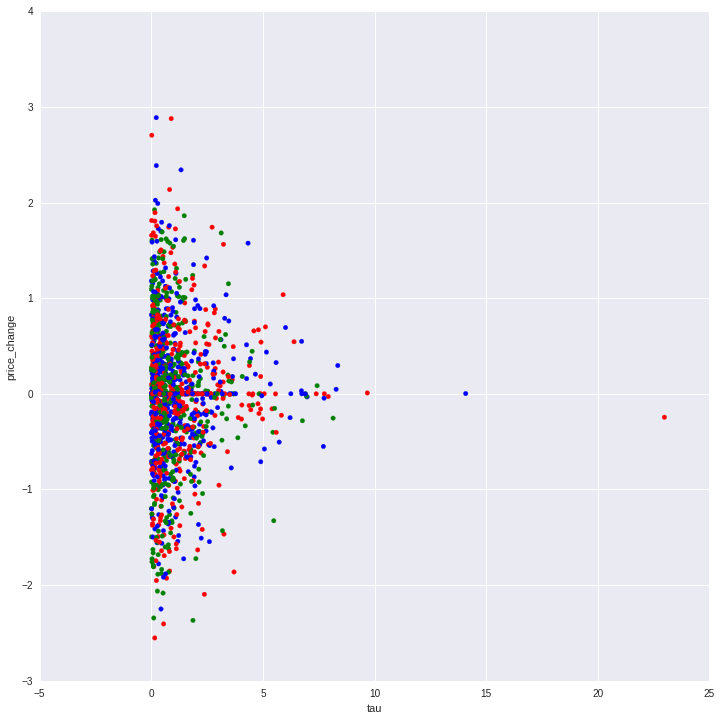

In [74]:
import sys 
import numpy as np 
sys.path.append('/home/kman/papers/QFPaper/Code/')

import pandas as pd
#import plotly
#import plotly.plotly as py
import seaborn as sns
from hmm import hmm_calibration
from observation_models import *
import matplotlib.pyplot as plt 
%matplotlib inline 
import copy

prng = np.random.RandomState(10)
n_components = 1
startprob = prng.rand(n_components)
startprob = startprob / startprob.sum()
transmat = prng.rand(n_components, n_components) #random starting point
transmat /= np.tile(transmat.sum(axis=1)[:, np.newaxis], (1, n_components))#normalising so all entries sum up to 1
epsilon = 1e-3

sigmas = [ .3, .8, 1.][0:n_components]
lambdas = [0.5, 1., 2.][0:n_components]
weights = [0.2, 0.1, 0.05][0:n_components]

sample_size = 1500
#generate state and observation data from the \"right\" distribution\n",
states = hmm_calibration.sample_states(startprob, transmat, prng, sample_size=sample_size)

observation_data = Exp_UniGauss.sample_data(states,lambdas, sigmas, weights, epsilon, rng=prng)
data_set = pd.DataFrame()
data_set['tau'] = observation_data[0]
data_set['price_change'] = observation_data[1]
data_set['state'] = states 

state_groups = data_set.groupby(['state']) 
fig, ax = plt.subplots(figsize=(12,12)) 
state_groups.plot(kind='scatter', x='tau', y='price_change', ax=ax, color=['red', 'green', 'blue']) 

        
plt.show() 

In [75]:
from sklearn import cluster 
kmeans = cluster.KMeans(n_clusters=n_components, random_state=3245) 
predict = kmeans.fit_predict(data_set[['tau', 'price_change']]) 
data_set['cluster_predict'] = predict 
groupby_cluster = data_set.groupby(['cluster_predict']) 
for cluster, cluster_group in groupby_cluster: 
    print cluster_group['state'].value_counts()  
    #print np.cov(cluster_group['price_change'])

1    583
2    336
0    184
dtype: int64
1    177
0    126
2     28
dtype: int64
0    49
1    17
dtype: int64


In [86]:
aa = groupby_cluster.groups
aa.keys()

[0, 1, 2]